# Rossmann Stores Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install numpy

^C


In [ ]:
#!pip install pandas

In [3]:
import pandas as pd

In [4]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [5]:
#The training Set
df_train = pd.read_csv("F:/ALmabetter/week1/projects_captson/Retail Sales Prediction/Data _ Resources/Rossmann Stores Data.csv",sep=',', parse_dates=['Date'],
                       low_memory = False)


#Additional Information on those stores 
df_store = pd.read_csv('F:/ALmabetter/week1/projects_captson/Retail Sales Prediction/Data _ Resources/store.csv'
                       , low_memory = False)

In [6]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_store.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(df_store.shape[0]),str(df_store.shape[1]))) 

The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object,
 None)

In [9]:
df_train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [10]:
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(df_train[(df_train.Open == 0)].count()[0]))


-Over those two years, 172817 is the number of times that different stores closed on given days.


### Missing Values 

In [11]:
print("df_train:\n\n", df_train.isnull().sum(),  
     "\n\ndf_store:\n\n", df_store.isnull().sum())

df_train:

 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

df_store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [12]:
#store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
 #                    'Promo2SinceYear', 'PromoInterval'], axis=1)
#store.head(5)

In [13]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

In [14]:
df_store[pd.isnull(df_store.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [15]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)


In [16]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [17]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_train_store.head() 
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1]))) 


The Train_Store dataset has 1017209 Rows and 18 Variables


In [19]:
df_train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [20]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']




In [21]:
x=df_train_store['SalesperCustomer'].mean()
df_train_store['SalesperCustomer'].fillna(x,inplace=True)

In [22]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


In [23]:
import itertools    

import matplotlib.pyplot as plt
import seaborn as sns

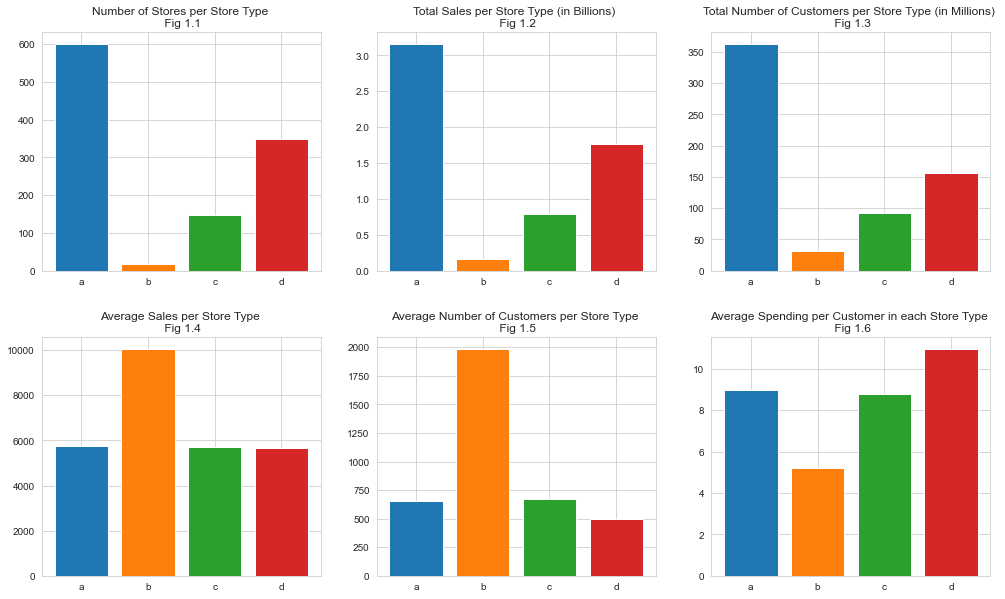

In [25]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

In [ ]:
! pip install seaborn



In [ ]:
!pip install matplotlib

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

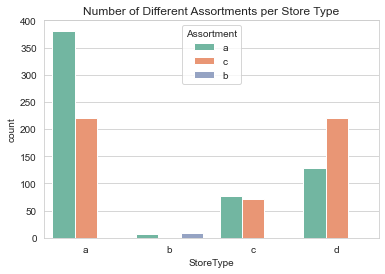

In [26]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=df_store,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
df_store.groupby(by=["StoreType","Assortment"]).Assortment.count()



In [27]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

In [28]:
df_train_store['Day']=df_train_store.Date.dt.day

In [29]:
df_train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,9.342457,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,8.626118,7,2015,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",9.493619,1,2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,0,9.493619,1,2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,0,9.493619,1,2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,0.0,0.0,0,9.493619,1,2013,1


<AxesSubplot:xlabel='StoreType', ylabel='count'>

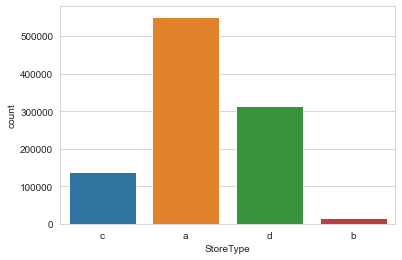

In [30]:
sns.countplot(df_train_store.StoreType)

In [31]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [32]:
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [33]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes

In [34]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

In [35]:
df_train_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                       category
SchoolHoliday                         int64
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                      category
SalesperCustomer                    float64
Month                                 int64
Year                                  int64
Day                                   int64
StateHoliday_cat                

In [36]:
del df_train_store["Date"]

In [37]:
df_train_store["StateHoliday"] = df_train_store["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})


In [38]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,Day,StateHoliday_cat,Assortment_cat,StoreType_cat,PromoInterval_cat
0,1,5,5263,555,1,1,0,1,c,a,...,0.0,0,9.482883,7,2015,31,0.0,0.0,2.0,0.0
1,2,5,6064,625,1,1,0,1,a,a,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31,0.0,0.0,0.0,2.0
2,3,5,8314,821,1,1,0,1,a,a,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31,0.0,0.0,0.0,2.0
3,4,5,13995,1498,1,1,0,1,c,c,...,0.0,0,9.342457,7,2015,31,0.0,2.0,2.0,0.0
4,5,5,4822,559,1,1,0,1,a,a,...,0.0,0,8.626118,7,2015,31,0.0,0.0,0.0,0.0


In [ ]:
del df_train_store['CompetitionOpenSinceYear']
del df_train_store['CompetitionOpenSinceMonth']
del df_train_store['StateHoliday_cat']
del df_train_store['Assortment_cat']
del df_train_store['StoreType_cat']
del df_train_store['PromoInterval_cat']

In [39]:
df_train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,Day,StateHoliday_cat,Assortment_cat,StoreType_cat,PromoInterval_cat
0,1,5,5263,555,1,1,0,1,c,a,...,0.0,0,9.482883,7,2015,31,0.0,0.0,2.0,0.0
1,2,5,6064,625,1,1,0,1,a,a,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31,0.0,0.0,0.0,2.0
2,3,5,8314,821,1,1,0,1,a,a,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31,0.0,0.0,0.0,2.0
3,4,5,13995,1498,1,1,0,1,c,c,...,0.0,0,9.342457,7,2015,31,0.0,2.0,2.0,0.0
4,5,5,4822,559,1,1,0,1,a,a,...,0.0,0,8.626118,7,2015,31,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1,a,a,...,2013.0,"Jan,Apr,Jul,Oct",9.493619,1,2013,1,1.0,0.0,0.0,2.0
1017205,1112,2,0,0,0,0,1,1,c,c,...,0.0,0,9.493619,1,2013,1,1.0,2.0,2.0,0.0
1017206,1113,2,0,0,0,0,1,1,a,c,...,0.0,0,9.493619,1,2013,1,1.0,2.0,0.0,0.0
1017207,1114,2,0,0,0,0,1,1,a,c,...,0.0,0,9.493619,1,2013,1,1.0,2.0,0.0,0.0


In [40]:
df_train_store=pd.get_dummies(df_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])


In [41]:
df_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,is_Assortment_b,is_Assortment_c,is_StoreType_a,is_StoreType_b,is_StoreType_c,is_StoreType_d,is_PromoInteval_0,"is_PromoInteval_Feb,May,Aug,Nov","is_PromoInteval_Jan,Apr,Jul,Oct","is_PromoInteval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,0,1,1270.0,9.0,...,0,0,0,0,1,0,1,0,0,0
1,2,5,6064,625,1,1,0,1,570.0,11.0,...,0,0,1,0,0,0,0,0,1,0
2,3,5,8314,821,1,1,0,1,14130.0,12.0,...,0,0,1,0,0,0,0,0,1,0
3,4,5,13995,1498,1,1,0,1,620.0,9.0,...,0,1,0,0,1,0,1,0,0,0
4,5,5,4822,559,1,1,0,1,29910.0,4.0,...,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:ylabel='Density'>

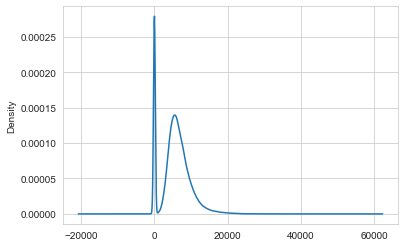

In [44]:
df_train_store['Sales'].plot(kind='kde')

In [42]:
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 33 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Store                             1017209 non-null  int64  
 1   DayOfWeek                         1017209 non-null  int64  
 2   Sales                             1017209 non-null  int64  
 3   Customers                         1017209 non-null  int64  
 4   Open                              1017209 non-null  int64  
 5   Promo                             1017209 non-null  int64  
 6   StateHoliday                      1017209 non-null  int64  
 7   SchoolHoliday                     1017209 non-null  int64  
 8   CompetitionDistance               1017209 non-null  float64
 9   CompetitionOpenSinceMonth         1017209 non-null  float64
 10  CompetitionOpenSinceYear          1017209 non-null  float64
 11  Promo2                            101

In [ ]:
df_train_store.drop([
       'is_PromoInteval_0','is_PromoInteval_Feb,May,Aug,Nov','Promo2SinceWeek',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec','Customers','Open','Promo2SinceYear'],axis=1,inplace=True)

In [ ]:
df_train_store.columns

In [ ]:
#y = df.Sales
#X = df.drop('Item_Outlet_Sales',axis = 1)

In [ ]:
df_train_store.isnull().sum()

In [ ]:
!pip install scikit-learn

In [ ]:
#Obtain copy of dataset for further us
df_train_store = df_train_store.sample(n=15000, random_state=1)

In [ ]:
df_train_store.columns

In [ ]:
df_train_store.columns

In [ ]:
X

In [ ]:
#Divide training dataset in x and y
X = df_train_store.drop('Sales', axis=1)
y = df_train_store.Sales

In [ ]:
print(X.shape,y.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
param = {
    'max_depth':[3,6,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [ ]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X,y)

In [ ]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100, max_depth=6,
)

In [ ]:
rf.fit(X,y)

In [ ]:
y_pred = rf.predict(X)

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

score = r2_score(y,y_pred)
print("Score:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

In [ ]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(rf,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [ ]:
import pickle
filename = 'model_assort.pkl'
pickle.dump(rf, open(filename, 'wb'))

# some time later...

In [ ]:
!pip freeze requirements.txt

In [ ]:
rfr = RandomForestRegressor(n_estimators=10, 
                             criterion='mse', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4,
                             random_state=31, 
                             verbose=0, 
                             warm_start=False)
rfr.fit(X_train, y_train)


In [ ]:
#with the optimal parameters i got let's see how it behaves with the validation set
rfr_val=RandomForestRegressor(n_estimators=128, 
                             criterion='rmse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, #setting n_jobs to 4 makes sure you're using the full potential of the machine you're running the training on
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)
model_RF_test=rfr_val.fit(X_train,y_train)

In [ ]:
yhat=model_RF_test.predict(X_train_test)

In [ ]:
plt.hist(yhat)

In [ ]:
error=rmspe(y_train_test,yhat)
error

In [ ]:
# stores opende on sundasy
df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique()

In [ ]:
df_train_store.columns

In [ ]:
df_train_store

In [ ]:
df_train_store['CompetitionOpenSince'] = np.where((df_train_store['CompetitionOpenSinceMonth']==0) & (df_train_store['CompetitionOpenSinceYear']==0) , 0,(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)))

In [ ]:
(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) +  (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)) 

In [ ]:
x=df_train_store['Month']-df_train_store['CompetitionOpenSinceMonth']
x

In [ ]:
(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth)

In [ ]:
# Distribution of competition distance
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [ ]:
# replace missing values in CompetitionDistance with median
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [ ]:
# extract year, month, day and week of year from "Date"
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train = train.reset_index()

In [ ]:
train.head(5)

### Joining tables

In [ ]:
df = pd.merge(train, store, how='left', on='Store')
df.head()

### Droping rows with no effect on prediction

In [ ]:
df = df[df.Open != 0]

In [ ]:
df.shape

In [ ]:
df = df.drop('Open', axis=1)

In [ ]:
df.shape

In [ ]:
df[df.Sales == 0]['Store'].sum()

In [ ]:
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

In [ ]:
df = df[df.Sales != 0]

In [ ]:
df.shape

### Feauture Engineering 

In [ ]:
#Nominal attributes
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

In [ ]:
df.info()

In [ ]:
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [ ]:
#Obtain copy of dataset for further use
df1 =  df.copy()
dfv = df.sample(n=5000, random_state=1)

In [ ]:
# Adding New variable AvgSales 

sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales.head(10)

In [ ]:
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()
sales.head(10)

In [ ]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [ ]:
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))
df1.head(5)

In [ ]:
# Adding New variable AvgCustomer

cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

In [ ]:
df1.head(5)

In [ ]:
# stateholiday variable

df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

In [ ]:
# we have converted stateholiday into 0 & 1 ,whether store is open =1 & closed =0

In [ ]:
df1.head(5)


```

### EDA

In [ ]:
corr = df1.corr()

In [ ]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

Common observation drawn from result is also that some stores always perform better than others. This 
might be because of factors unique to that particular store and not represented in given data. 
After AvgSales second best feature was Promo. Sales are highly correlated to promotion from store. Sales 
are observed to be increased around 30% in the period of promotions. So regression models learned this 
feature so whenever there is promotion for store it is predicted high sales for that store. This can be 
important thing to note for store managers as a future strategy to improve business.

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Daily Sales:$')
plt.ylabel('Number of Entries')
plt.title('Sales Distribution')
plt.hist(x=df1.Sales,bins=50);

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Number of customers daily')
plt.ylabel('Number of Entries')
plt.title('Customer Distribution')
plt.hist(x=df1.AvgCustomer,bins=50);

In [ ]:
promo0 = df1.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = df1.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

In [ ]:

plt.figure(figsize=(12,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

In [ ]:
#EDA

# sales vs date

In [ ]:

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

store_id = df.Store.unique()[0]
print(store_id)
store_rows = df[df['Store'] == store_id]
print(store_rows.shape)
store_rows.resample('1D', on='Date')['Sales'].sum().plot.line(figsize=(14,4))

In [ ]:
df1.columns

In [ ]:
df1['AvgSales'].plot.hist(bins=5,alpha=0.6)

In [ ]:
plt.rcParams['figure.figsize'] = (15.0,12.0)

f,ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1,8):
    data = df1[df1['DayOfWeek'] == i ]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(df1['AvgCustomer'],df1['Sales'],label=i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [ ]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(15,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="DayOfWeek", y="Sales", data=df1)

From the plot, we can tell that Tue through Fri’s sales distributions are very close. Mon, Sat and Sun’s sales distributions are unique. In database, DayofWeek is represented as numeric number From plot, we know that there is no linear relationship from 1­7 number to sales data. We treat DayofWeek as four factors, Mon


1-Monday,2-Tuesday,3-wen,4-thur,5-frid 6-sat,7-sunday


in sunday sales is high ,even if you dont applied promo


In [ ]:
# Customer Vs Sales of Different Days of the Week

In [ ]:
plt.scatter(df1['AvgCustomer'], df1['Sales'], c=df1['DayOfWeek'],label=i,alpha=0.6,cmap=plt.cm.get_cmap('YlGn'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
#School Holiday Vs Sales

In [ ]:
for i in [0,1]:
    data = df1[df1['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomer'], data['Sales'], label = i)
 

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
###### School Holidays doesnt have much impact on sales at the store.

In [ ]:
# Effect of Promo Code on Sales

In [ ]:
for i in [0,1]:
    data = df1[df1['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomer'], data['Sales'], label = i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [ ]:
## We know by intution that promo code should have an effect on sales.We can confirm from the above plot that promo code did have an affect on the sales.

In [ ]:
## Average Customer Vs Average Sales

In [ ]:
Here we have plotted a scatter plot with store type as hue.We can clearly see that as the average customers increases at the store the sales increases.This is quite Natural.

We can see that store type b has more Average Customers and sales.This may be because the store type b is in urban areas or it sells products which are more in demand.

In [ ]:
## Competition Distance Vs Average Sales

In [ ]:
df1["CompetitionDistance"].fillna(-1)

plt.scatter(df1['CompetitionDistance'],df1['AvgSales'])

plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

Competition Distance is the distance of other store with the Rossmann Store.We can see that when the competition disance is low then the sales is more.This is counter intutive that if there are competitors aroud you then your sales is also more.

This is because store are more in urban areas. And in urban areas the stores of competitors are also present.Sales happen more in Urban areas that is why even if competitors are nearby the sales are more.

In [ ]:
Sales Over Weeks

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x='WeekOfYear',y='Sales',data=df1)
plt.title('sales VS week')
plt.xlabel('Week Of Year')
plt.ylabel('sales')
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(x='DayOfWeek',y='Sales',data=df)
plt.title('sales VS week')
plt.xlabel('Day Of Week')
plt.ylabel('total sales')
plt.show()

In [ ]:
Sales by Store Type

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType',y='Sales',data=df1)
plt.title('sales VS week')
plt.xlabel('storetype')
plt.ylabel('total sales')
plt.show()

In [ ]:
#storetype b has more sales compaird to a,b,c

In [ ]:
# Sales vs. Number Of Customers


In [ ]:
import seaborn as sns

sns.scatterplot(data=df1, x="AvgCustomer", y="Sales",hue='StoreType')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

## Prediction Models

In [ ]:
#df1.shape
dfd = df1.sample(n=50000, random_state=1)

In [ ]:
#Divide training dataset in x and y
X = dfd.drop('Sales', axis=1)
y = dfd.Sales

In [ ]:
y.head(10)

In [ ]:
xd = X.copy()
xd = pd.get_dummies(xd)

In [ ]:

xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.2, random_state=1)

In [ ]:
xl = X.copy()

# Lable encoding

label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [ ]:
#label encoder of DT models
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.2, random_state=1)

## 1. Linear Regression

In [ ]:
#Build linear regression model
lin_model = LinearRegression()

#Train model on training dataset
lin_model.fit(xd_train, yd_train)

In [ ]:
#Error functions

def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  

def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_pred)), axis=0))

    return loss

In [ ]:
#Predict using model

yd_predicted = lin_model.predict(xd_train)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yd_train, yd_predicted))
print("MAPE :",mape(yd_train, yd_predicted))

In [ ]:
#Predict target on test data using model

yd_test_predicted = lin_model.predict(xd_test)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yd_test, yd_test_predicted))
print("MAPE :",mape(yd_test, yd_test_predicted))

## 2. Decision Tree

In [ ]:
#Build decision tree model
tree_model = DecisionTreeRegressor(min_samples_leaf=20)

#Train model on training dataset
tree_model.fit(xl_train, yl_train)

In [ ]:
#Predict using model

yl_pred = tree_model.predict(xl_train)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_train, yl_pred))
print("MAPE :",mape(yl_train, yl_pred))



In [ ]:

#Predict target on test data using model

yl_pred_test = tree_model.predict(xl_test)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_test, yl_pred_test))
print("MAPE :",mape(yl_test, yl_pred_test))


## 3. Random Forest 

In [ ]:
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.2, random_state=0)

In [ ]:
#Build random forest model
rdf_model = RandomForestRegressor(n_estimators=30)

#Train model on training dataset
rdf_model.fit(xl_train, yl_train)

In [ ]:
#Predict using model
#train
yl_pred = rdf_model.predict(xl_train)


#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_train, yl_pred))
print("MAPE :",mape(yl_train, yl_pred))

In [ ]:
#Predict target on test data using model

yl_pred_test = rdf_model.predict(xl_test)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_test, yl_pred_test))
print("MAPE :",mape(yl_test, yl_pred_test))

In [ ]:
rdf_model.score(xl_test, yl_test)

In [ ]:


regressor=[['Liner Regression :',LinearRegression()],
       ['Decision Tree reg :',DecisionTreeRegressor()],
       ['Random Forest regre :',RandomForestRegressor()]]
rmse_score=[]
mape_score=[]
for name,model in regressor:
    model=model
    model.fit(xl_train,yl_train)
    predictions = model.predict(xl_test)
    rmse_score.append(rmspe(yl_test,predictions))
    mape_score.append(mape(yl_test,predictions))
    #print('RMSE Score')



    
    print('RMSE score',name,rmspe(yl_test,predictions))
    print('MAPE score',name,mape(yl_test,predictions))
    

In [ ]:
y_hats_test  = pd.DataFrame(yl_pred_test)

In [ ]:
yl_test

In [ ]:
actual=[]
for i in yl_test:
    actual.append(i)
    

In [ ]:
actual_pred=actual

In [ ]:
actual_sale_val=pd.DataFrame(actual_pred)

In [ ]:
actual_sale_val

In [ ]:
predicted_sale_val=pd.DataFrame(y_hats_test)

In [ ]:
predicted_sale_val

In [ ]:
frames = [actual_sale_val,predicted_sale_val]

In [ ]:
result1 = pd.concat([actual_sale_val,predicted_sale_val], axis=1)

In [ ]:
result1.columns

In [ ]:
result1.set_axis(['Actual_sales', 'predicted_sales'], axis=1, inplace=True)

In [ ]:
result1

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(result1.Actual_sales-result1.predicted_sales)
plt.show()

In [ ]:
# result is Gausian distributed so our model is good

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(yl_test,predicted_sale_val, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
g=plt.scatter(result1.Actual_sales,result1.predicted_sales)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')


In [ ]:
## testing pkl file

In [ ]:
import pickle

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('rf_model_sales.pkl', 'wb')

# dump information to that file
pickle.dump(rdf_model, file)

In [ ]:
model = open('rf_model_sales.pkl','rb')
forest = pickle.load(model)

In [ ]:
#hyperparam RF

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(xl_train,yl_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(xl_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
#after hyperparam

In [ ]:
#Build random forest model
rdf_model1 = RandomForestRegressor(max_depth= 25,
 max_features='sqrt',
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators= 2000  )
#Train model on training dataset
rdf_model1.fit(xl_train, yl_train)

In [ ]:
#Predict using model
#train
yl_pred = rdf_model1.predict(xl_train)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_train, yl_pred))
print("MAPE :",mape(yl_train, yl_pred))

In [ ]:
#Predict target on test data using model

yl_pred_test = rdf_model1.predict(xl_test)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_test, yl_pred_test))
print("MAPE :",mape(yl_test, yl_pred_test))

In [ ]:
# RF performing good ,so we select simple rf without hyperparam tunning.

In [ ]:
#XGBOOST model

##GB model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators= 1500,max_depth=4,min_samples_leaf=2,random_state=0)
gb.fit(xl_train, yl_train)


In [ ]:
#Predict using model
#train
yl_pred = gb.predict(xl_train)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_train, yl_pred))
print("MAPE :",mape(yl_train, yl_pred))

In [ ]:
#Predict target on test data using model

yl_pred_test = gb.predict(xl_test)

#Calculate RMSE and MAPE

print("The model performance for training dataset:\n")
print("RMSPE :",rmspe(yl_test, yl_pred_test))
print("MAPE :",mape(yl_test, yl_pred_test))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test) 

print("Training RMSE", ":", rmspe(yd_train, yd_predicted),
      "Testing RMSE", ":", rmspe(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

In [ ]:

regressor=[['Liner Regression :',LinearRegression()],
       ['Decision Tree regression :',DecisionTreeRegressor()],
       ['Random Forest regression :',RandomForestRegressor()],
       ['KNN regressoin:',KNeighborsRegressor()],
       ['GradientBoostingRegressor:',GradientBoostingRegressor()]]
rmse_score=[]
mape_score=[]
for name,model in regressor:
    model=model
    model.fit(xl_train,yl_train)
    predictions = model.predict(xl_test)
    rmse_score.append(rmspe(yl_test,predictions))
    mape_score.append(mape(yl_test,predictions))
    #print('RMSE Score')



    
    print('RMSE score :',name,rmspe(yl_test,predictions),"," , 'MAPE score',name,mape(yl_test,predictions))

In [ ]:
Random forestregressor using CV WE Get :